# Diabetes Prediction

## Understanding Data

In [55]:
# Importing needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Reading csv into dataframe
df=pd.read_csv('diabetes.csv')


df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [57]:
# Describing data to analyze better
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [58]:
# Information of dataset.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [59]:
# We can see that there are no null values in dataset. No need to treat missing data

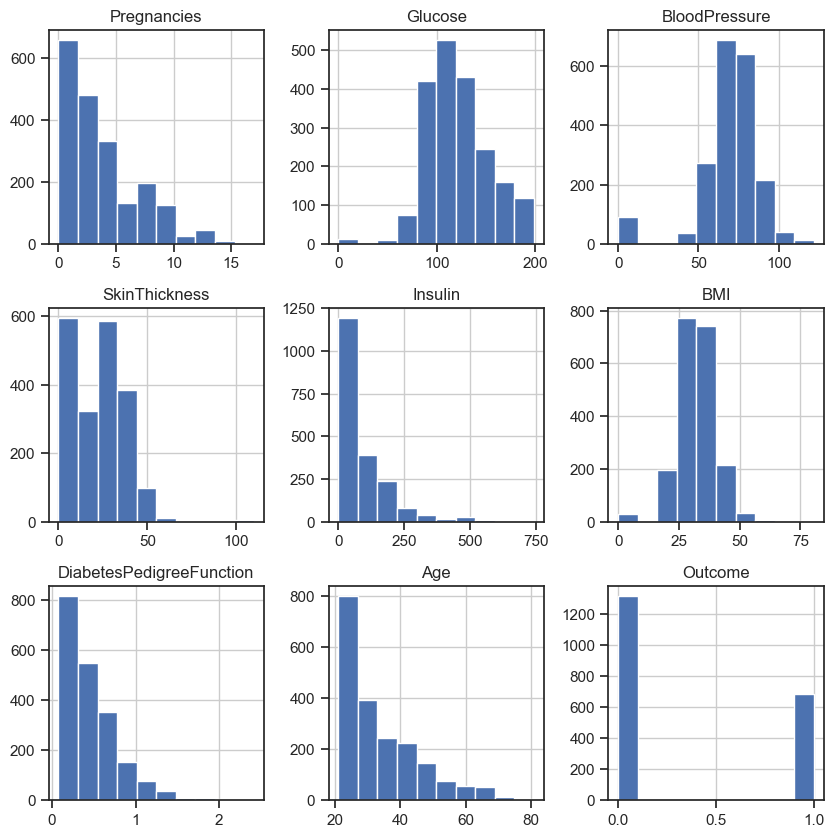

In [60]:
# Histogram tables
df.hist(bins=10,figsize=(10,10))
plt.show()

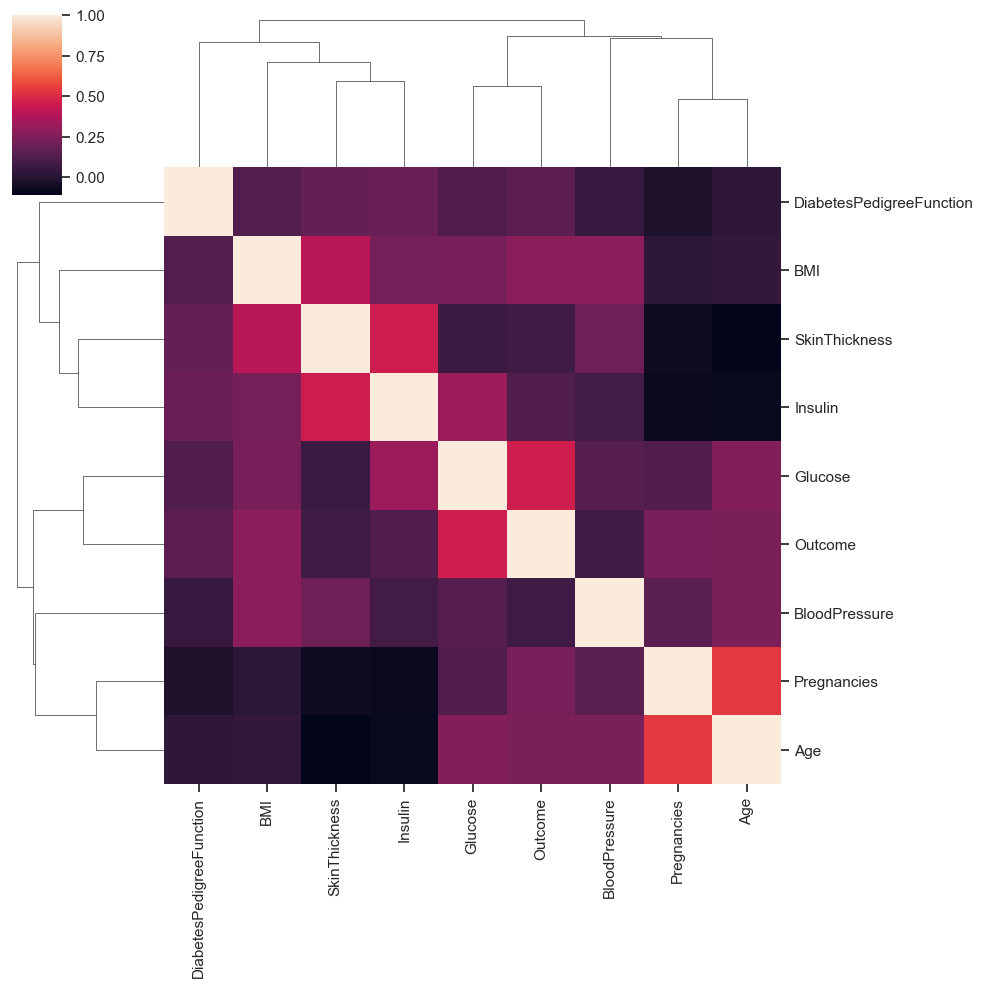

In [61]:
# Looking for correlation in data

sns.clustermap(df.corr())

In [62]:
# There are no positive correlation.
# Just age and pregnancies has negative correlation

<AxesSubplot: xlabel='count', ylabel='Outcome'>

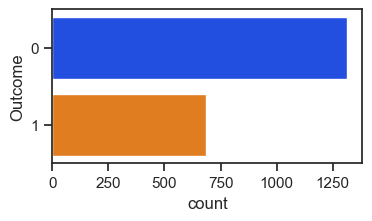

In [63]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette="bright")

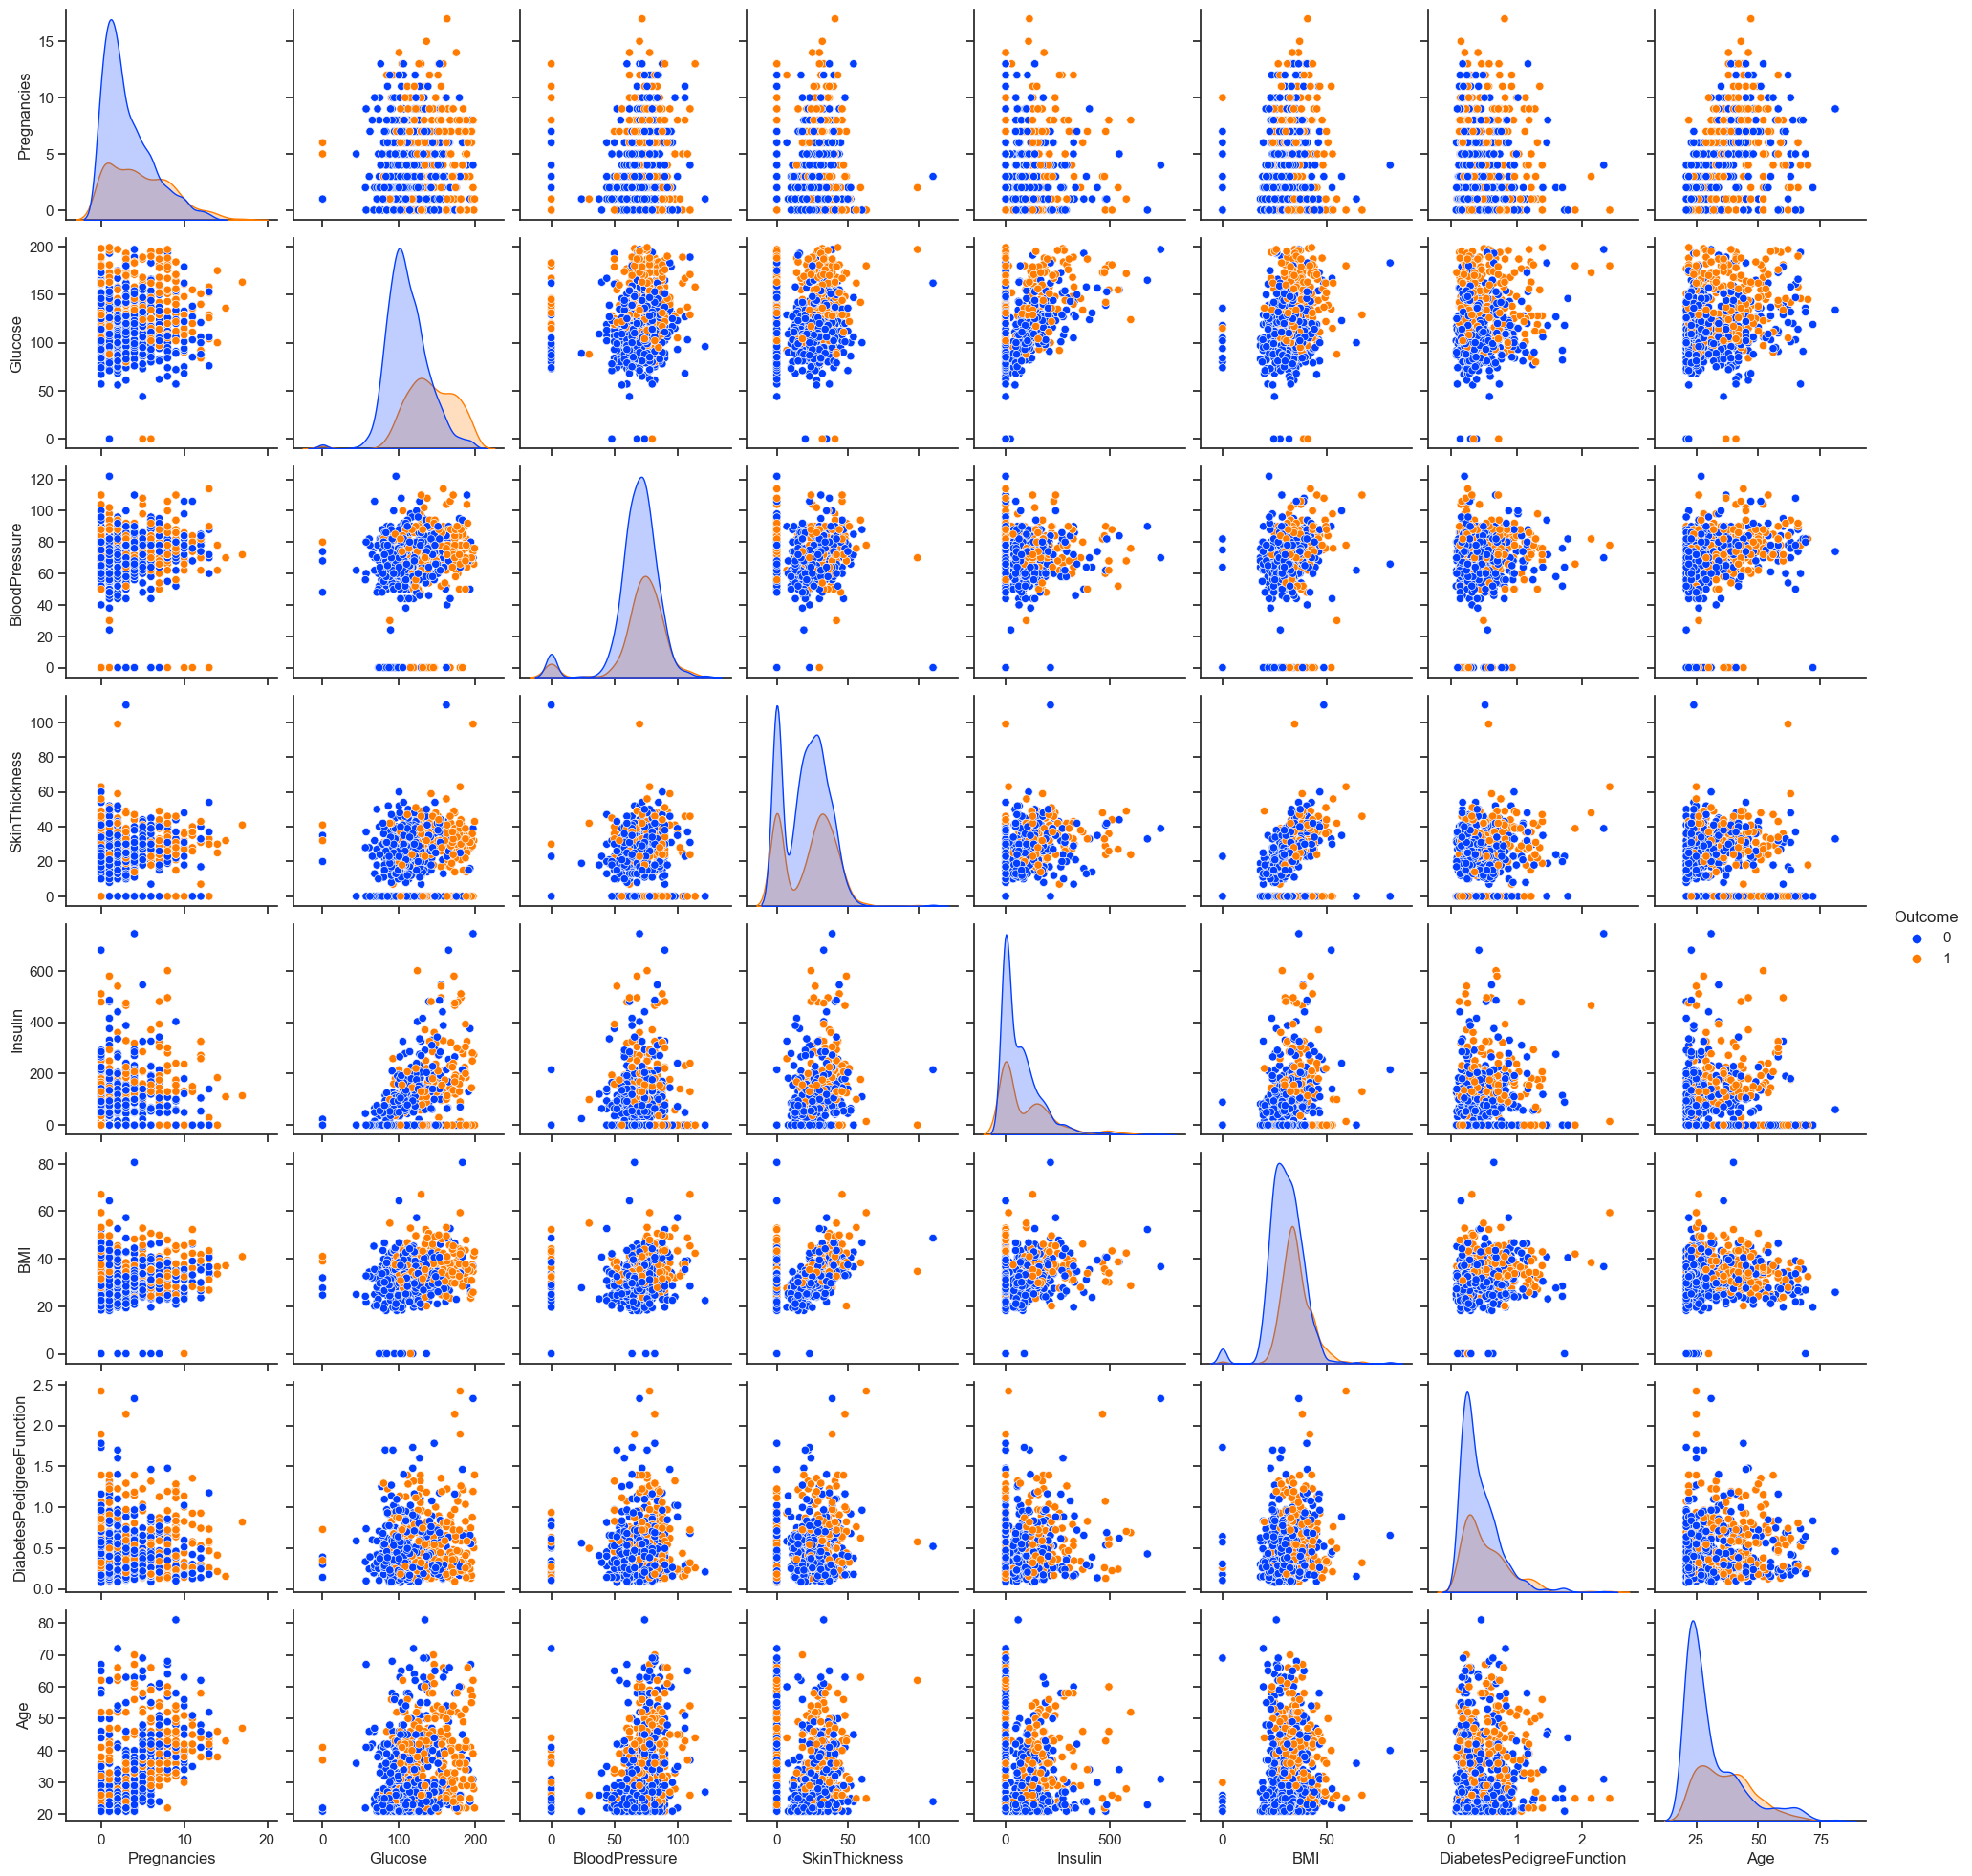

In [64]:
sns.set_theme(style="ticks", palette="bright")
sns.pairplot(df, hue="Outcome")

<AxesSubplot: >

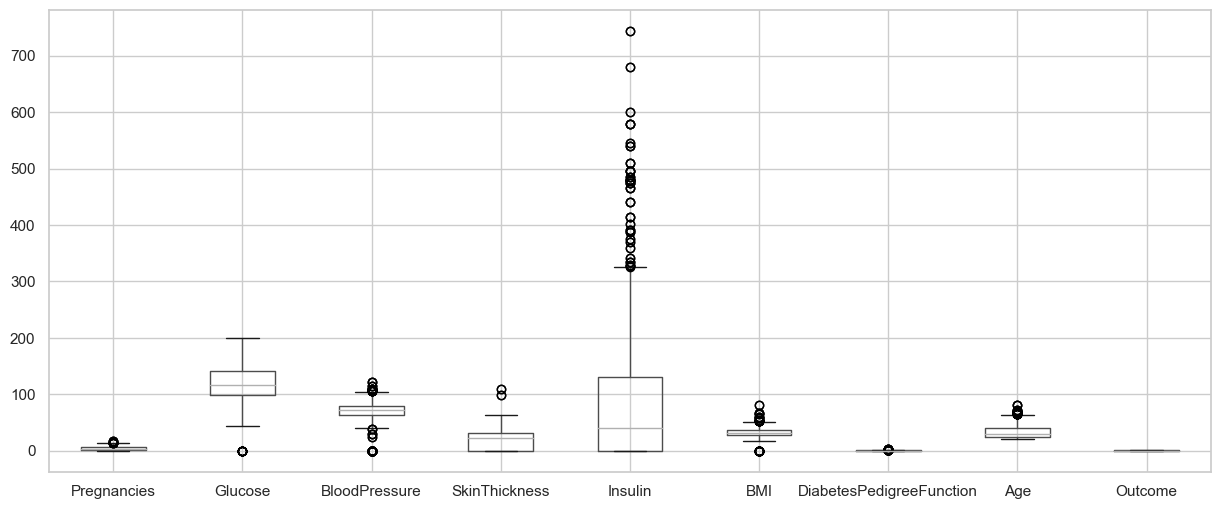

In [65]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

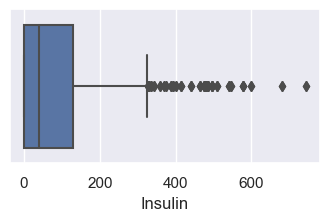

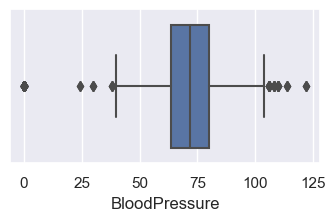

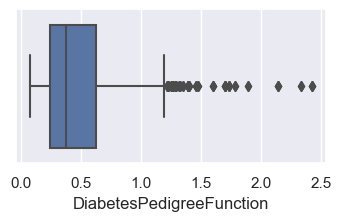

In [66]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [67]:
# Outlier removing

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

# The IQR describes the middle 50% of values when ordered from lowest to highest.
# To find the interquartile range (IQR), first find the median (middle value) of the lower and upper half of the data. 
# These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.


print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))


---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [68]:
# Removing the data lower than Q1 and greater than Q3, creating new dataframe with values.

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the new dataframe's shape to understand what percent of data was outlier.
df.shape,df_out.shape

((2000, 9), (1652, 9))

In [69]:
# 17.4% of data was outlier and they are removed. 

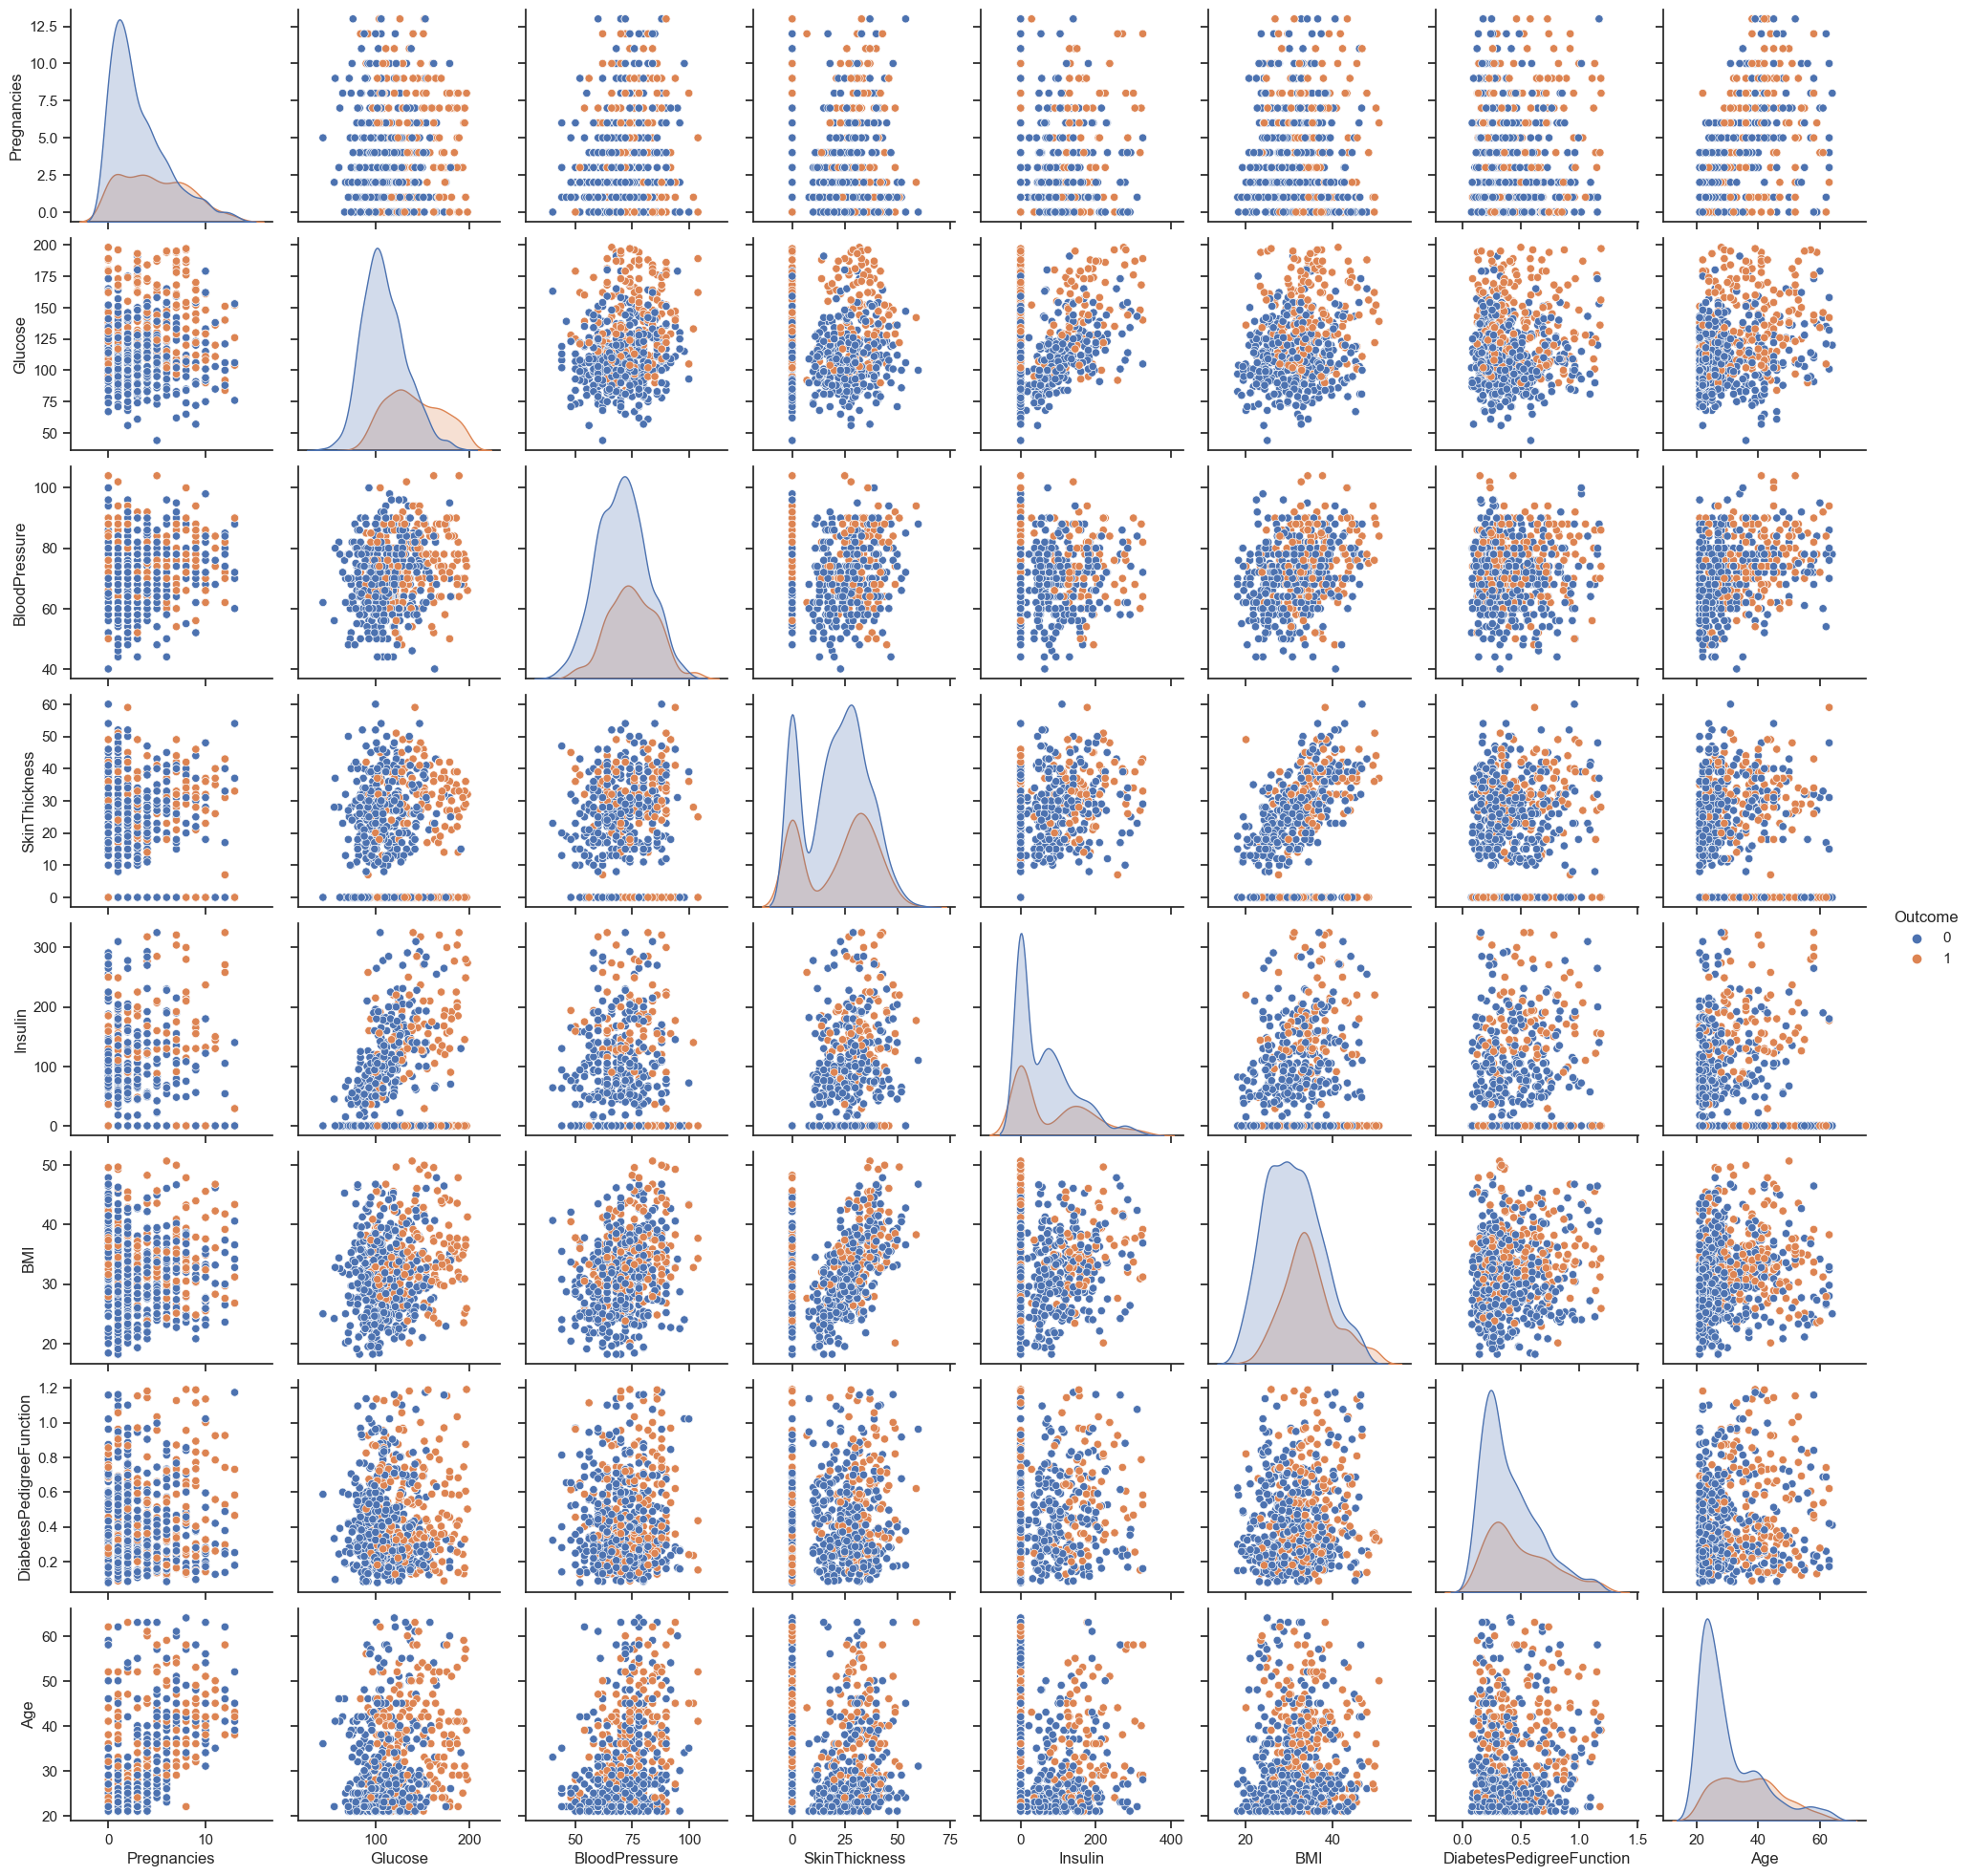

In [70]:
# Scatter matrix after removing outlier

sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [71]:
# Extracting features and targets to train data

X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [72]:
# Splitting the data into 80-20 ratio as train and test sets. 

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2)

In [73]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [74]:
# Creating confusion matrix

from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): # true negative
    return confusion_matrix(y_true, y_pred)[0, 0]

def fp(y_true, y_pred): # false positive
    return confusion_matrix(y_true, y_pred)[0, 1]

def fn(y_true, y_pred): # false negative
    return confusion_matrix(y_true, y_pred)[1, 0]

def tp(y_true, y_pred): # true positive
    return confusion_matrix(y_true, y_pred)[1, 1]

# Cross valitadion
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [75]:
print(scoring)

{'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn)}


Models I used:
    
- Logistic Regression, 
- Support Vector Machine
- K-nearest neighbors algorithm
- Random Forest
- Naive Bayes Theorem
- Gradient Boosting Classifier


In [76]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)



Accuracy 0.8066465256797583 ROC 0.7433641578902304


/Users/cagla/opt/anaconda3/envs/dmenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/cagla/opt/anaconda3/envs/dmenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

TP:  [24 21 24 26 21 21 15 23 24 23]
TN:  [79 79 85 80 85 86 87 79 83 80]
FN:  [18 20 17 15 20 20 26 19 18 19]
FP:  [12 12  6 11  6  5  4 11  7 10]


/Users/cagla/opt/anaconda3/envs/dmenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#Support Vector Machine

from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)



Accuracy 0.8006042296072508 ROC 0.7281231269800497
TP:  [24 21 19 25 21 21 18 23 25 23]
TN:  [80 81 83 80 85 86 88 80 84 82]
FN:  [18 20 22 16 20 20 23 19 17 19]
FP:  [11 10  8 11  6  5  3 10  6  8]


In [78]:
# k-nearest neighbors algorithm

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)



Accuracy 0.8731117824773413 ROC 0.8484887404743556
TP:  [33 33 28 34 27 31 26 30 29 30]
TN:  [79 76 85 80 85 79 82 79 77 81]
FN:  [ 9  8 13  7 14 10 15 12 13 12]
FP:  [12 15  6 11  6 12  9 11 13  9]


In [79]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9879154078549849 ROC 0.9803921568627452
TP:  [42 37 39 36 37 38 36 40 42 38]
TN:  [91 87 90 88 85 91 88 89 87 90]
FN:  [0 4 2 5 4 3 5 2 0 4]
FP:  [0 4 1 3 6 0 3 1 3 0]


Actual  Predicted
65         0          0
1891       1          1
1975       1          1
1354       0          0
977        0          0

In [80]:
#Naive Bayes Theorem

#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)



Accuracy 0.7734138972809668 ROC 0.7302209093244285
TP:  [29 25 25 27 23 24 16 26 27 29]
TN:  [75 73 80 77 81 78 80 76 75 73]
FN:  [13 16 16 14 18 17 25 16 15 13]
FP:  [16 18 11 14 10 13 11 14 15 17]


In [81]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)



Accuracy 0.8912386706948641 ROC 0.8615891771555784
TP:  [34 33 33 32 30 34 24 28 32 30]
TN:  [84 83 87 87 86 85 87 84 83 86]
FN:  [ 8  8  8  9 11  7 17 14 10 12]
FP:  [7 8 4 4 5 6 4 6 7 4]


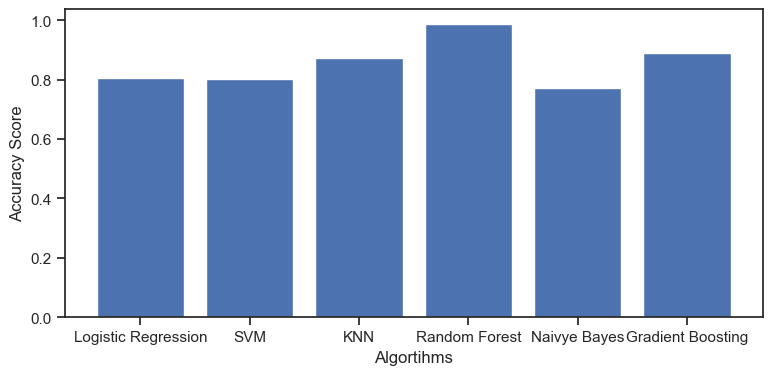

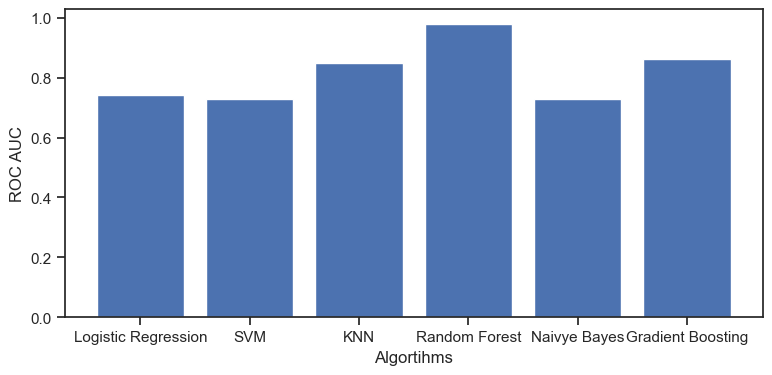

In [82]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()


# Random forest has highest accuracy 98% and Area under the ROC Curve is 97%
